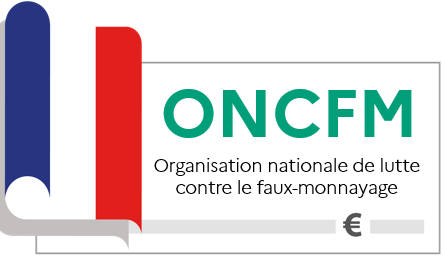

#**3.3** - Application

In [ ]:
# import du modèle sauvegardé
from google.colab import files
uploaded = files.upload()

Saving model_logreg.pkl to model_logreg.pkl


In [ ]:
import pandas as pd
import pickle

# 1. Charger le modèle sauvegardé
with open("model_logreg.pkl", "rb") as f:
    model = pickle.load(f)

# 2. Uploader un fichier CSV en local
uploaded = files.upload()

# 3. Lire le fichier
df = pd.read_csv(next(iter(uploaded)))

# 4. Définir les features utilisées
features = ["margin_up", "height_right", "height_left", "length", "diagonal", "margin_low"]

# 5. Prédictions
preds = model.predict(df[features])
df["prediction"] = preds

# 6. Probabilités de la classe "vrai" (classe 1)
probas = model.predict_proba(df[features])[:, 1]  # prendre la proba de la classe 1
df["probabilité_vrai"] = probas.round(3)  # arrondi à 3 décimales

# 7. Affichage avec la colonne id + prédiction + probabilité
id_cols = [col for col in df.columns if "id" in col.lower()]
display_cols = id_cols + ["prediction", "probabilité_vrai"]
print(df[display_cols])

# 8. Export du fichier CSV avec les prédictions et probas
df.to_csv("resultats_predictions.csv", index=False)
files.download("resultats_predictions.csv")

Saving simulated_billets.csv to simulated_billets.csv
       id  prediction  probabilité_vrai
0     A_1        True             0.996
1     A_2        True             0.999
2     A_3       False             0.000
3     A_4       False             0.095
4     A_5       False             0.045
..    ...         ...               ...
95   A_96       False             0.066
96   A_97        True             0.910
97   A_98       False             0.000
98   A_99       False             0.026
99  A_100       False             0.046

[100 rows x 3 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>